In [407]:
import pandas as pd
import numpy as np
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix

In [408]:
#reading the Dataset
df =  pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [409]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [410]:
#Get the number of columns: len(df.columns)
print(len(df.columns))

12


In [411]:
#Get the number of rows: len(df)
print(len(df))

5110


In [412]:
#checking for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [413]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [414]:
#Data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

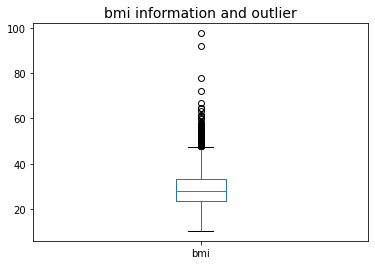

In [415]:
df['bmi'].plot(kind='box')
plt.title('bmi information and outlier', fontsize=14)
plt.show()

In [416]:
#outliers
bmi_out=df.loc[df['bmi']>50]
bmi_out['bmi'].shape

(79,)

In [417]:
df["bmi"] = pd.to_numeric(df["bmi"])
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

In [418]:
#Fill null data with the mean of the column bmi
bm=df['bmi'].mean()
df['bmi'].fillna(bm, inplace=True)

In [419]:
#checking for missing values
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [421]:
#Delete id column
df.drop("id",inplace=True,axis=1)

In [422]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

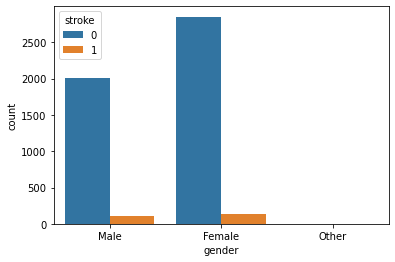

In [423]:
sns.countplot(data=df,x='gender',hue='stroke')

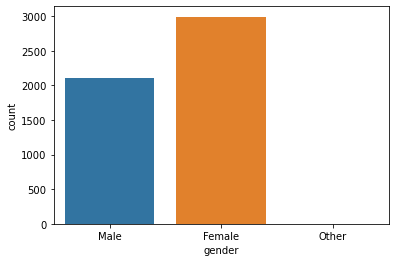

In [424]:
sns.countplot(data=df,x='gender')

In [425]:
#converting the value to Male
df['gender']=df['gender'].replace('Other','Male')

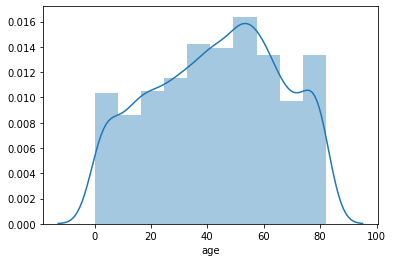

In [426]:
sns.distplot(df['age'], bins=10, kde=True)

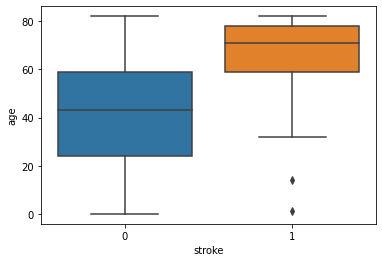

In [427]:
sns.boxplot(data=df,x='stroke',y='age')

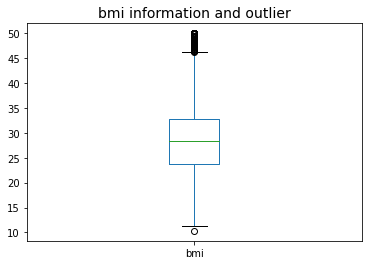

In [428]:
df['bmi'].plot(kind='box')
plt.title('bmi information and outlier', fontsize=14)
plt.show()

In [429]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

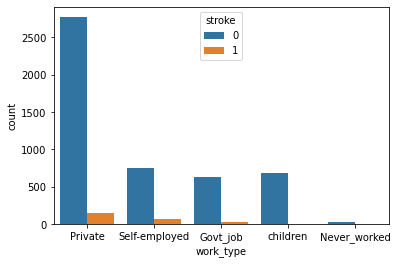

In [430]:
sns.countplot(data=df,x='work_type',hue='stroke')

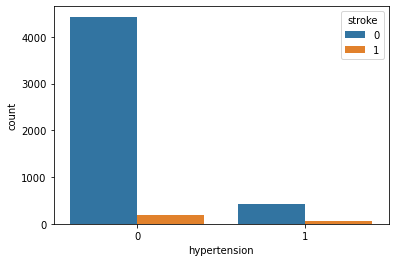

In [431]:
sns.countplot(data=df,x='hypertension',hue='stroke')

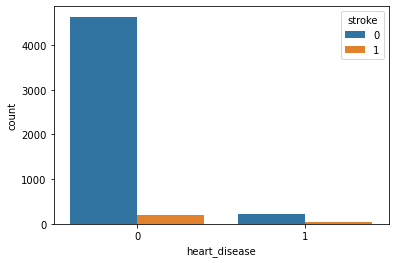

In [432]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

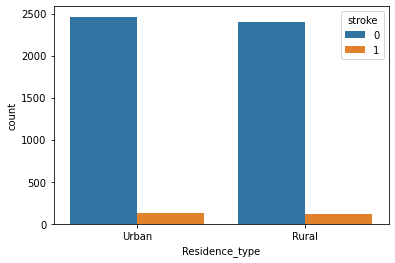

In [433]:
sns.countplot(data=df,x='Residence_type',hue='stroke')

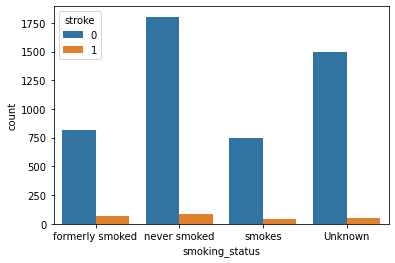

In [434]:
sns.countplot(data=df,x='smoking_status',hue='stroke')

In [435]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

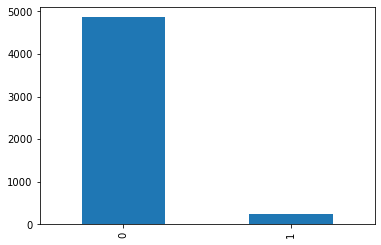

In [436]:
#This is imbalanced dataset
df['stroke'].value_counts().plot(kind='bar')

In [437]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

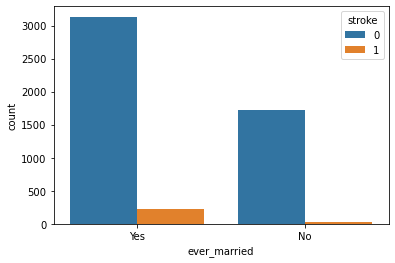

In [438]:
sns.countplot(data=df,x='ever_married',hue='stroke')

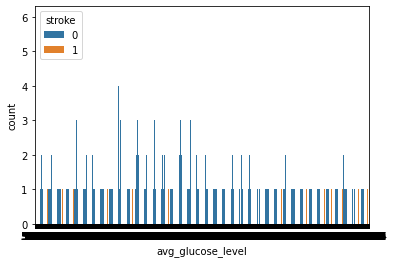

In [439]:
sns.countplot(data=df,x='avg_glucose_level',hue='stroke')

In [440]:
# convert categorical data into numeric data
column=df.select_dtypes(include=['object']).columns
print(column)

label=LabelEncoder()
df[column]=df[column].apply(label.fit_transform)
df.head(10)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.791465,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.791465,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


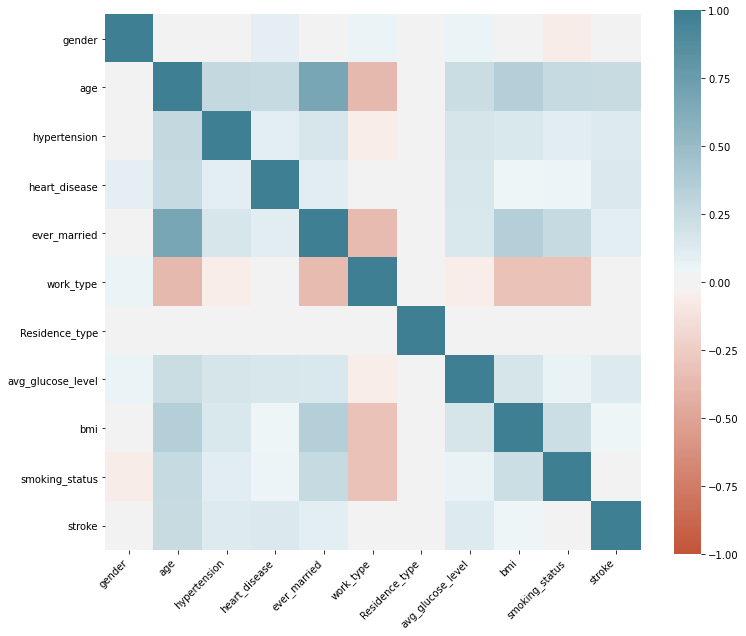

In [441]:
#see the correlation between attributes to see the relation between them
plt.figure(figsize=(12,10))
corr =df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=220),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [442]:
df.corr(method ='pearson')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027924,0.021143,0.085617,-0.030483,0.056532,-0.006340,0.054902,-0.026806,-0.062496,0.009027
age,-0.027924,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.343863,0.265199,0.245257
hypertension,0.021143,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.155365,0.111038,0.127904
heart_disease,0.085617,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.043295,0.048460,0.134914
ever_married,-0.030483,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.350572,0.259647,0.108340
work_type,0.056532,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.312208,-0.305927,-0.032316
Residence_type,-0.006340,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,0.002849,0.008237,0.015458
avg_glucose_level,0.054902,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.176300,0.063437,0.131945
bmi,-0.026806,0.343863,0.155365,0.043295,0.350572,-0.312208,0.002849,0.176300,1.000000,0.228942,0.042798
smoking_status,-0.062496,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.228942,1.000000,0.028123


In [443]:
#the ever_married and age column has a correlation of 0.68
#delet ever_married column
df = df.drop(['ever_married'], axis = 1)
df.head(5)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.791465,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,3,0,174.12,24.000000,2,1


In [444]:
standar = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
ss = standar.fit_transform(df[['avg_glucose_level','bmi','age']])
ss = pd.DataFrame(ss,columns=columns)

df=df.drop(columns=columns,axis=1)
ss.head()

,avg_glucose_level,bmi,age
0,2.706375,1.067297e+00,1.051434
1,2.121559,3.399179e-15,0.786070
2,-0.005028,5.068952e-01,1.626390
3,1.437358,7.665936e-01,0.255342
4,1.501184,-6.549137e-01,1.582163


In [445]:
df = pd.concat([df, ss], axis=1)
df.head(5)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.067297e+00,1.051434
1,0,0,0,3,0,2,1,2.121559,3.399179e-15,0.786070
2,1,0,1,2,0,2,1,-0.005028,5.068952e-01,1.626390
3,0,0,0,2,1,3,1,1.437358,7.665936e-01,0.255342
4,0,1,0,3,0,2,1,1.501184,-6.549137e-01,1.582163


In [498]:
#splitting the data in x and y that is input and output
x=df.drop(['stroke'], axis=1)
y=df['stroke']

In [499]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=124, stratify=y )

In [500]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1458    0]
 [  75    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/Users/sumaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [501]:
f1_score(y_test, logreg.predict(x_test))

0.0

In [449]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred =classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1319  139]
 [  48   27]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1458
           1       0.16      0.36      0.22        75

    accuracy                           0.88      1533
   macro avg       0.56      0.63      0.58      1533
weighted avg       0.93      0.88      0.90      1533



In [502]:
f1_score(y_test, classifier.predict(x_test))

0.22875816993464052

In [503]:
svm= SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1458    0]
 [  75    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/Users/sumaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sumaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [504]:
f1_score(y_test, svm.predict(x_test))

0.0

In [505]:
KNe = KNeighborsClassifier()

KNe.fit(x_train, y_train)

y_pred=KNe.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1451    7]
 [  75    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [506]:
f1_score(y_test, svm.predict(x_test))

0.0

In [508]:
#under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x, y)

In [509]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=124, stratify=y_resampled )

In [510]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56 19]
 [16 59]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        75
           1       0.76      0.79      0.77        75

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



In [511]:
accuracy_score(y_test, logreg.predict(x_test))

0.7666666666666667

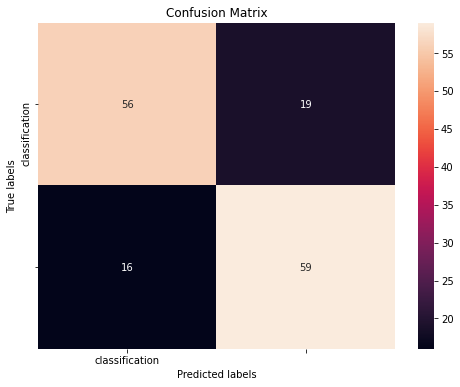

In [456]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [467]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred =classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62 13]
 [29 46]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        75
           1       0.78      0.61      0.69        75

    accuracy                           0.72       150
   macro avg       0.73      0.72      0.72       150
weighted avg       0.73      0.72      0.72       150



In [468]:
accuracy_score(y_test, classifier.predict(x_test))

0.72

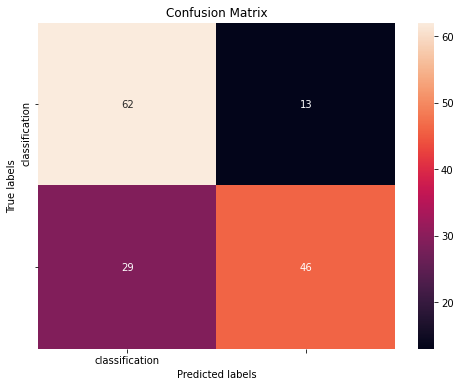

In [469]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [470]:
svm= SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53 22]
 [16 59]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        75
           1       0.73      0.79      0.76        75

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



In [471]:
accuracy_score(y_test, svm.predict(x_test))

0.7466666666666667

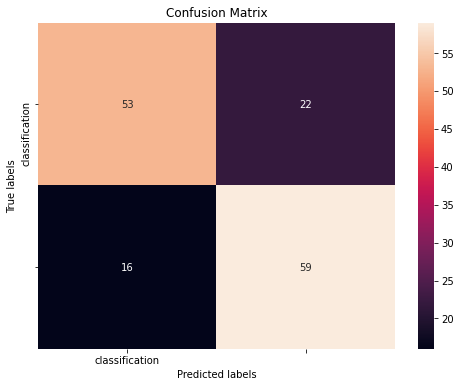

In [472]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [473]:
KNe = KNeighborsClassifier()

KNe.fit(x_train, y_train)

y_pred=KNe.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53 22]
 [22 53]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        75
           1       0.71      0.71      0.71        75

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



In [474]:
accuracy_score(y_test, KNe.predict(x_test))

0.7066666666666667

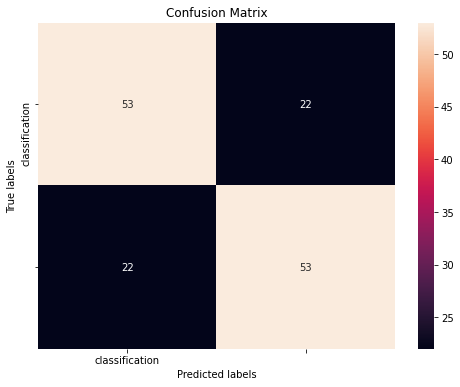

In [475]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [483]:
#over sampling
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y == 1)
n_neg = np.sum(y == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(x, y)

In [484]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X_tr_rs, y_tr_rs,test_size=0.3,random_state=124, stratify=y_tr_rs )

In [485]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1385   74]
 [ 221   78]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1459
           1       0.51      0.26      0.35       299

    accuracy                           0.83      1758
   macro avg       0.69      0.61      0.62      1758
weighted avg       0.80      0.83      0.81      1758



In [486]:
accuracy_score(y_test, logreg.predict(x_test))

0.8321956769055745

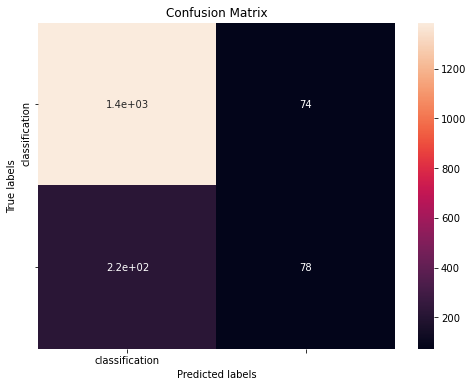

In [487]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [488]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred =classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1263  196]
 [ 150  149]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1459
           1       0.43      0.50      0.46       299

    accuracy                           0.80      1758
   macro avg       0.66      0.68      0.67      1758
weighted avg       0.82      0.80      0.81      1758



In [489]:
accuracy_score(y_test, classifier.predict(x_test))

0.8031854379977247

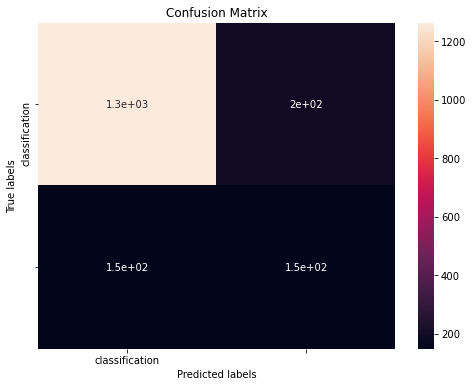

In [490]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [491]:
svm= SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1442   17]
 [ 250   49]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1459
           1       0.74      0.16      0.27       299

    accuracy                           0.85      1758
   macro avg       0.80      0.58      0.59      1758
weighted avg       0.83      0.85      0.81      1758



In [492]:
accuracy_score(y_test, svm.predict(x_test))

0.8481228668941979

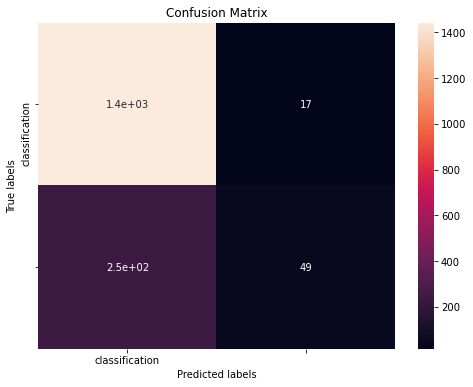

In [493]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);

In [494]:
KNe = KNeighborsClassifier()

KNe.fit(x_train, y_train)

y_pred=KNe.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1290  169]
 [  84  215]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1459
           1       0.56      0.72      0.63       299

    accuracy                           0.86      1758
   macro avg       0.75      0.80      0.77      1758
weighted avg       0.87      0.86      0.86      1758



In [495]:
accuracy_score(y_test, KNe.predict(x_test))

0.8560864618885097

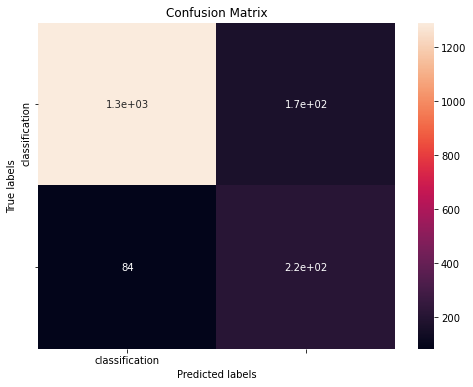

In [496]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['classification']); 
ax.yaxis.set_ticklabels(['classification']);